<a href="https://colab.research.google.com/github/meka-williams/BBW-Insight-Dashboard/blob/main/Problem_set_02_Instance_classifiers_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is part the of Dr. Christoforos Christoforou's course materials. You may not, nor may you knowingly allow others to reproduce or distribute lecture notes, course materials or any of their derivatives without the instructor's express written consent.

# Problem Set 02 - Instance-based Classifiers
**Professor:** Dr. Christoforos Christoforou

For this problem set you will need the following libraries, which are pre-installed with the colab environment:

* [Numpy](https://www.numpy.org/) is an array manipulation library, used for linear algebra, Fourier transform, and random number capabilities.
* [Pandas](https://pandas.pydata.org/) is a library for data manipulation and data analysis.
* [Matplotlib](https://matplotlib.org/) is a library which generates figures and provides graphical user interface toolkit.

You can load them using the following import statement:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

## 1. Objective
As part of this problem set, you will expore work on the `wine quality dataset`  in order to:
- To explore the physiocochemical properties of red wine
- To determine an optimal machine learning model for red wine quality classification

For that, you will be using an `instance-based` classifier, namely K-NN algorithm. Review the information provided in the problem set, and complete all challenges listed.  

## 2. Wine Quality Dataset - Data Description

For this dataset you will be using the `wine quality dataset`. Below is a description of the various parameters listed in that dataset (i.e. potential features):

* fixed.acidity (tartaric acid - g / dm^3): most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
* volatile.acidity (acetic acid - g / dm^3): the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
* citric.acid (g / dm^3): the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
* residual.sugar (g / dm^3): the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
* chlorides (sodium chloride - g / dm^3): the amount of salt in the wine
* free.sulfur.dioxide (mg / dm^3): the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
* total.sulfur.dioxide (mg / dm^3): amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
* density (g / cm^3): the density of water is close to that of water depending on the percent alcohol and sugar content
* pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
* sulphates (potassium sulphate - g / dm3): a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
* alcohol (% by volume): the percent alcohol content of the wine
* quality: quality score between 0 and 10



## Download dataset from kaggle
You will use the Kaggle CLI to dowload the `Wine Quality Dataset` to your colab enviroment. You will need to upload your kaggle API (see problem_set 01 for direction on how to obtain your API key.

In [2]:
# install kaggle CLI
!pip install -q kaggle

In [3]:
# Upload the kaggle API key of your account
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [4]:
# View list of data files available in the dataset.
# Format : kaggle dataset files <dataset-URI>
!kaggle datasets files cchristoforou/practice-dataset-for-tutorials

name                       size  creationDate                
-----------------------  ------  --------------------------  
countries.csv              2485  2021-02-25 21:48:51.465000  
country_total.csv        546179  2021-02-25 21:48:51.442000  
dataset_37_diabetes.csv   33824  2021-02-25 21:48:51.881000  
wine.data                 10782  2021-02-25 21:48:51.885000  
wineQualityReds.csv       94286  2021-02-25 21:48:51.458000  


In [5]:
# Download - Specify the parameters.
kaggle_dataset_URI = "cchristoforou/practice-dataset-for-tutorials"
output_folder = "sample_data/problem_set02"
kaggle_data_file1 = "wineQualityReds.csv"

In [6]:
# Download the first file from dataset - countries.csv
!kaggle datasets download $kaggle_dataset_URI --file $kaggle_data_file1 --path $output_folder


Dataset URL: https://www.kaggle.com/datasets/cchristoforou/practice-dataset-for-tutorials
License(s): unknown
  0% 0.00/92.1k [00:00<?, ?B/s]
100% 92.1k/92.1k [00:00<00:00, 222MB/s]


## Load the data
The code below showcase how to load the data in a pandas `DataFrame` and apply a train_test_split on the data.

In [7]:
# Code to load the data from file. Here we use the pandas library to read the csv file.
datafile = "./sample_data/problem_set02/wineQualityReds.csv"
wine_df = pd.read_csv(datafile)
wine_df.drop(wine_df.columns[0],axis=1,inplace=True)

In [8]:
from sklearn.model_selection import train_test_split

# Split the data into a training and testing set using the sklearn function train_test_split
# Noteice that
X_train, X_test, y_train, y_test = train_test_split(wine_df.drop('quality',axis=1), wine_df['quality'], test_size=.25, random_state=42)

## Challenge 1
Use the variables `X_train`, `X_test`, `y_train`, and `y_test` to explore your data. In particular, calculate and display the following information.

* Number of samples in the training set in total and in each class.
* Number of samples in the testing set in total and in each class.
* Number of features in the dataset.
* Number of classes in the dataset.
* IDs of the number of classes.


In [43]:
# Your Solution here

nrows, ncols = X_train.shape
print(f"Number of samples in the training set in total: {nrows}")

nrows, ncols = X_test.shape
print(f"Number of samples in the testing set in total: {nrows}")

print(f"Number of features in the dataset: {ncols}")

nclasses = y_train.nunique()
class_names = y_train.unique()
print(f"Number of classes in the dataset: {nclasses} and their IDs are  {class_names}")

Number of samples in the training set in total: 1199
Number of samples in the testing set in total: 400
Number of features in the dataset: 11
Number of classes in the dataset: 2 and their IDs are  ['Bad' 'Good']


# Challenge 2

Train a **K-NN** classifier using the `(X_train,y_train)` dataset and use the trained model to predict the underlying classes for the observations in the test dataset `X_test`. Store your prediction in a variable called `y_pred`.

In [10]:
# Your solution
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 3)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Challenge 3

Evaluate the performance of your classifier. Calculate and display the following:
* print the `confusion matrix`.
* `normalized confusion matrix`.
* the probablitity of correct classification (accuracy score).
* the `precision`, `recall`, and `f1-score` for each class.

Confusion Matrix
[[ 0  0  1  0  0  0]
 [ 0  1  3  8  1  0]
 [ 1 12 98 48  4  1]
 [ 0 15 74 62 18  0]
 [ 0  0 10 21 15  2]
 [ 0  0  1  2  2  0]]

Normalized Confusion Matrix

Accuracy Score: 
0.44

Precision Score: 
0.4468071662901137

Recall Score: 
0.44

F1 Score: 
0.44044032570861846


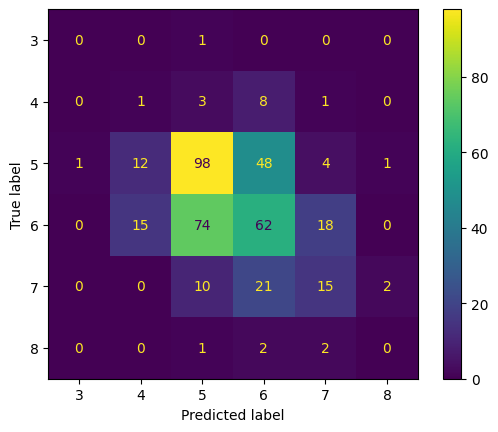

In [11]:
# Your solution
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

# confusion matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

# normalized confusion matrix
print("\nNormalized Confusion Matrix")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

print("\nAccuracy Score: ")
print(accuracy_score(y_test, y_pred))

print("\nPrecision Score: ")
print(precision_score(y_test, y_pred, average='weighted'))

print("\nRecall Score: ")
print(recall_score(y_test, y_pred, average='weighted'))

print("\nF1 Score: ")
print(f1_score(y_test, y_pred, average='weighted'))

# Challenge 4

The code below loads the same dataset, but treats it as a binary classification problem. That is, instead of classifying an observation into one of 10 categories (0..10), we consider all observations with score above 5 as being good and all observation below or equal to five as being bad.





In [12]:
# Code to load the data from file. Here we use the pandas library to read the csv file.
datafile = "./sample_data/problem_set02/wineQualityReds.csv"
wine_df = pd.read_csv(datafile)
wine_df.drop(wine_df.columns[0],axis=1,inplace=True)

wine_df['quality'] = np.where(wine_df['quality']>5,"Good","Bad")

In [13]:
X_train, X_test, y_train, y_test = train_test_split(wine_df.drop('quality',axis=1), wine_df['quality'], test_size=.25, random_state=42)


## Callenge 4.1
Use the variables `X_train`, `X_test`, `y_train`, and `y_test` to explore your data. In particular, calculate and display the following information.
* Number of samples in the training set in total and in each class.
* Number of samples in the testing set in total and in each class.
* Number of features in the dataset.
* Number of classes in the dataset.
* IDs of the number of classes.




In [41]:
# Your Solution
nsamples = X_train.shape[0]
print(f"There are {nsamples} samples in the training set in total")

nsamples = X_test.shape[0]
print(f"There are {nsamples} samples in the testing set in total")

nfeatures = X_train.shape[1]
print(f"There are {nfeatures} features in the dataset")

nclasses = y_train.nunique()
print(f"There are {nclasses} classes in the dataset")

classes = y_train.nunique()
class_names = y_train.unique()
print(f"The number of classes is {classes} and their IDs are {class_names}")

There are 1199 samples in the training set in total
There are 400 samples in the testing set in total
There are 11 features in the dataset
There are 2 classes in the dataset
The number of classes is 2 and their IDs are ['Bad' 'Good']


## Challenge 4.2
Train a **K-NN** classifier using the `(X_train,y_train)` dataset and use trained model to predict the underlying classes for the observations in the test dataset `X_test`. Store your prediction in a variable called `y_pred`.

In [15]:
# Your solution
model = KNeighborsClassifier(n_neighbors = 3)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## Challenge 4.3
Evaluate the performance of your classifier. Calculate and display the following:
* print the `confusion matrix`.
* `normalized confusion matrix`.
* the probablitity of correct classification (accuracy score).
* the `precision`, `recall`, and `f1-score` for each class.

Confusion Matrix
[[108  70]
 [ 82 140]]

Normalized Confusion Matrix

Accuracy Score: 
0.62

Precision Score: 
0.6229473684210527

Recall Score: 
0.62

F1 Score: 
0.6209178743961352


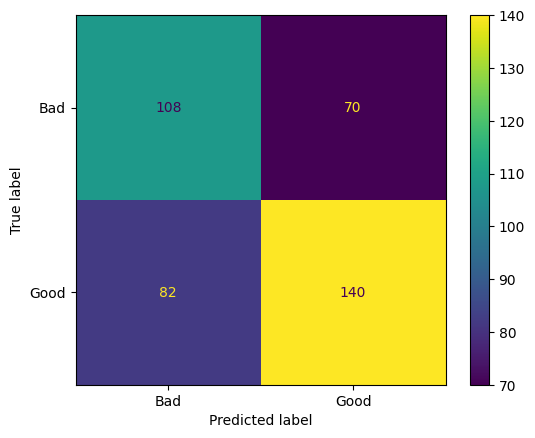

In [16]:
# Your Solution
# confusion matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

# normalized confusion matrix
print("\nNormalized Confusion Matrix")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

print("\nAccuracy Score: ")
print(accuracy_score(y_test, y_pred))

print("\nPrecision Score: ")
print(precision_score(y_test, y_pred, average='weighted'))

print("\nRecall Score: ")
print(recall_score(y_test, y_pred, average='weighted'))

print("\nF1 Score: ")
print(f1_score(y_test, y_pred, average='weighted'))

# Challenge 5

The **Knn** classifier accepts a number of parameters. One of those parameters is the number K (i.e. the number of nearest neighbors to consider when making a prediction. Evaluate the classifier for different values of K and identify which configuration achieve the best performance on the testing set. Plot or print your results.


In [35]:
# Your Solution Here
neighbor_performance = []

for k in range(1,11):
  model = KNeighborsClassifier(n_neighbors = k)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  performance = {
      '# of neighbors': k,
      'accuracy': accuracy_score(y_test, y_pred),
      'precision': precision_score(y_test, y_pred, average='weighted'),
      'recall': recall_score(y_test, y_pred, average='weighted'),
      'f1_score': f1_score(y_test, y_pred, average='weighted')
  }
  neighbor_performance.append(performance)

display(pd.DataFrame(neighbor_performance))

,# of neighbors,accuracy,precision,recall,f1_score
0,1,0.6475,0.648120,0.6475,0.647774
1,2,0.5875,0.623349,0.5875,0.579707
2,3,0.6200,0.622947,0.6200,0.620918
3,4,0.5925,0.619251,0.5925,0.588562
4,5,0.6200,0.620891,0.6200,0.620384
5,6,0.5975,0.620966,0.5975,0.594887
6,7,0.5975,0.600238,0.5975,0.598419
7,8,0.5975,0.611682,0.5975,0.597608
8,9,0.6050,0.605918,0.6050,0.605399
9,10,0.5950,0.606971,0.5950,0.595577


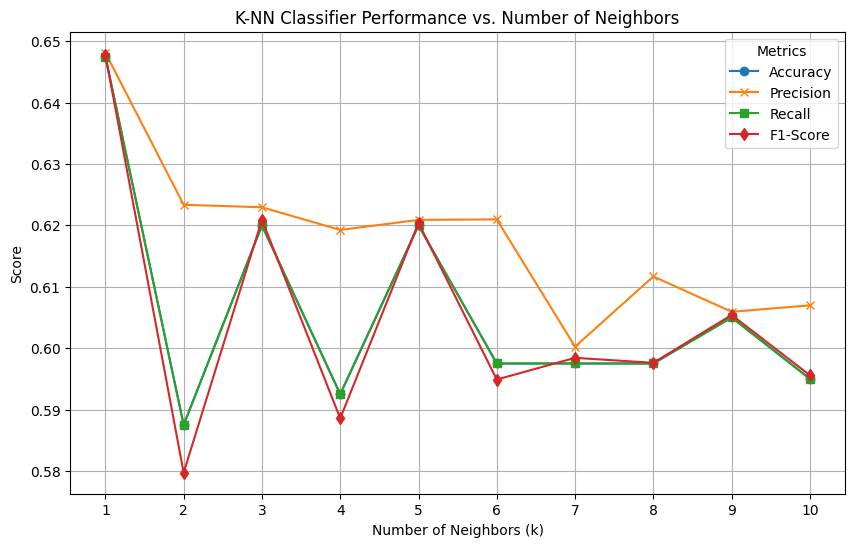

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot([x['# of neighbors'] for x in neighbor_performance], [x['accuracy'] for x in neighbor_performance], label='Accuracy', marker='o')
plt.plot([x['# of neighbors'] for x in neighbor_performance], [x['precision'] for x in neighbor_performance], label='Precision', marker='x')
plt.plot([x['# of neighbors'] for x in neighbor_performance], [x['recall'] for x in neighbor_performance], label='Recall', marker='s')
plt.plot([x['# of neighbors'] for x in neighbor_performance], [x['f1_score'] for x in neighbor_performance], label='F1-Score', marker='d')

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.title('K-NN Classifier Performance vs. Number of Neighbors')
plt.xticks(range(1, 11))
plt.grid(True)
plt.legend(title = "Metrics")
plt.show()

Based on the performance metrics for the KNN classifier for the number of neighbors (k) ranging from 1 to 10, the KNN classifier achieved the best performance when k = 1.


Copyright Statement: Copyright © 2020 Christoforou. The materials provided by the instructor of this course, including this notebook, are for the use of the students enrolled in the course. Materials are presented in an educational context for personal use and study and should not be shared, distributed, disseminated or sold in print — or digitally — outside the course without permission. You may not, nor may you knowingly allow others to reproduce or distribute lecture notes, course materials as well as any of their derivatives without the instructor's express written consent.